### Disease prediction
Datasetet *cardio_train.csv* som innehåller data om ca 70 000 personer undersöktes, där syftet var att förutspå förekomsten av hjärt-kärlsjukdomar utifrån givna data.

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("cardio_train.csv", sep=";")
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Det konstaterades att min- och max-värden hos vissa av prediktorerna är orimliga, och att en del poster kommer att behöva rensas ut. Kvartilavstånd och medianer såg normala ut. Av de 70 000 personerna hade nästan exakt hälften testat positivt för hjärt-kärlsjukdom. 

In [18]:
df["cardio"].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

Kolesterolvärdena undersöktes för patienterna. Variabeln är kategorisk, där 1=*normal*, 2=*above normal*, och 3=*well above normal*. Resultatet redovisas i diagrammet nedan. Det konstaterades att ca 3/4 av alla i den gruppen hade normalt kolesterolvärde, medan kategori 2 och 3 utgjorde vardera ca 1/8. 

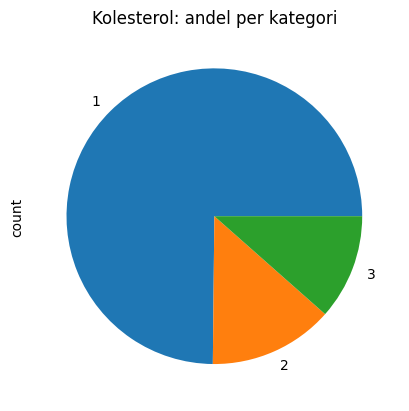

In [19]:
df["cholesterol"].value_counts().plot(kind="pie")
plt.title("Kolesterol: andel per kategori");

Åldrarna i underökningsgruppen är angiven i dagar. Ett histogram med *binwidth*=100 gav en oväntad fördelning av åldrarna, med toppar och dalar ungefär i 2-årsintervall. En närmare analys i form av ett histogram där alla åldrar beräknats modulo 730 (antal dagar på 2 år), gav vid handen att många är födda i början och slutet av varje 2-årsperiod, men nästan ingen i mitten. Någon förklaring till denna fördelning finns ej, men det finns anledning att misstänka att det är ett systematiskt fel av något slag.

Omräknat till år ligger åldrarna mellan 39 och 62 år, med några få undantag vars poster rensas bort på grund av deras orimlighet.

Text(0.5, 1.0, 'Åldersfördelning mod 730 (2 år)')

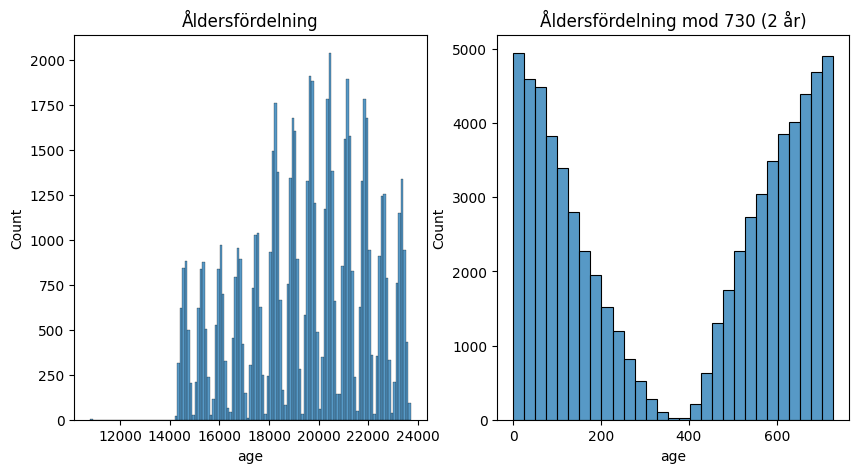

In [ ]:
fig, ax=plt.subplots(1, 2, figsize=(10,5))

sns.histplot(df["age"], binwidth=100, ax=ax[0]).set_title("Åldersfördelning")
sns.histplot(df["age"] % 730, ax=ax[1]).set_title("Åldersfördelning mod 730 (2 år)")

In [6]:
df["smoke"].value_counts(normalize=True)

smoke
0    0.911871
1    0.088129
Name: proportion, dtype: float64

#### Fråga 4
Vi ser att ca 91% är icke-rökare (Kategori 0), medan ca 9% är rökare (1).

<Axes: ylabel='weight'>

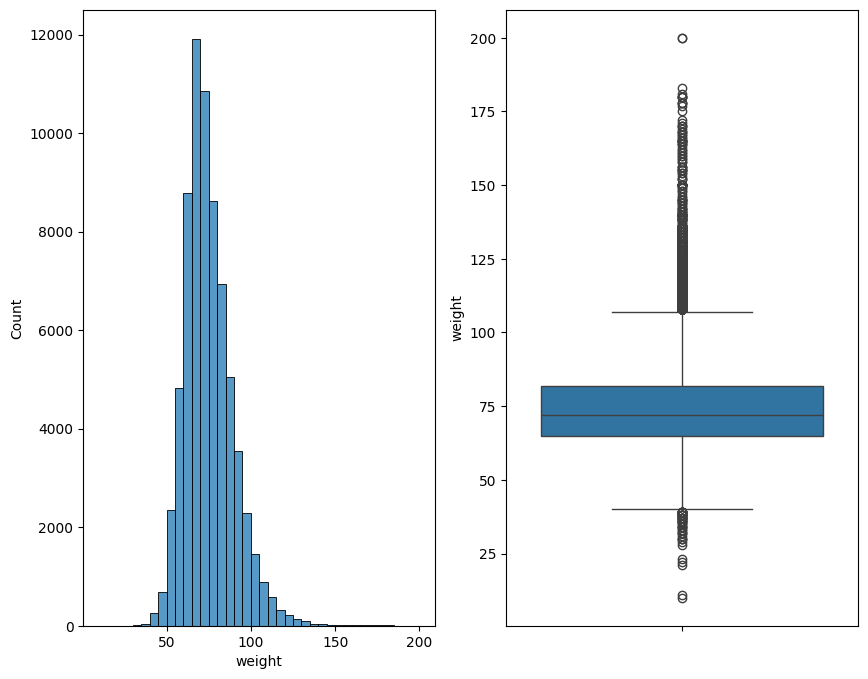

In [7]:
# sns.histplot(df["weight"], binwidth=5)

fig, ax=plt.subplots(1, 2, figsize=(10,8))
sns.histplot(df["weight"], binwidth=5, ax=ax[0])
sns.boxplot(df["weight"], ax=ax[1])

#### Fråga 5
I histogrammet ovan ser vi fördelningen av vikterna, i 5-kilosintervall. Fördelningen är ganska lik en normalfördelning med ett medelvärde kring 75, men det ser ut som att det även finns ganska många överviktiga, kanske inte så förvånande när det handlar om hjärtsjukdomar.

<Axes: ylabel='height'>

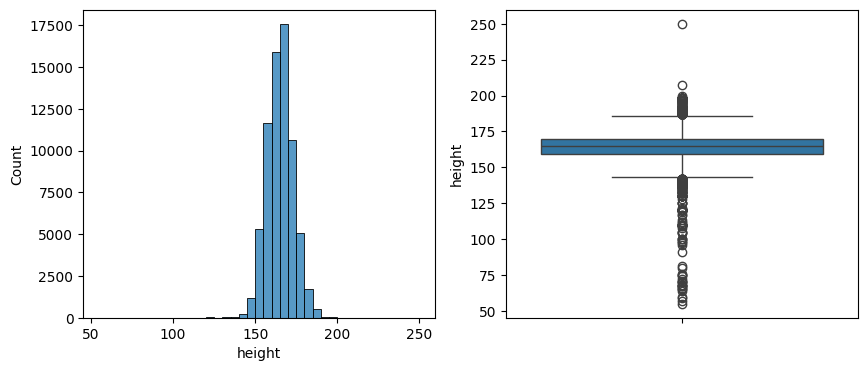

In [8]:
fig, ax=plt.subplots(1, 2, figsize=(10,4))
sns.histplot(df["height"], binwidth=5, ax=ax[0])
sns.boxplot(df["height"], ax=ax[1])


#### Fråga 6
Vi ritar ett histogram över kroppslängderna, med klassbredden 5 cm. Vid en första anblick ser det ganska normalt ut, något som påminner om en normalfördelning med medelvärde kring 165 cm. Men vi blir lite misstänksamma när x-skalan går ända från 50 till 250 cm. Finns det möjligen ett fåtal utliggare vars staplar är så låga så att de inte syns? En titt i _df.describe()_-tabellen bekräftar våra misstankar, och för att tydligare se dessa utliggare ritar vi även ett boxplot-diagram över kroppslängderna.

I boxplotten ser vi ett ganska smalt kvartilavstånd, vilket är naturligt när det gäller kroppslängder. Det är många utliggare, vilket ju inte är konstigt i ett dataset med 70 000 poster. Men vissa av utliggarna ser misstänkta ut. Framför allt har vi en stor grupp mellan ca 55 och 80 cm (och därefter ett litet "hopp" till de mer normala utliggarna). Det verkar högst osannolikt att det finns så många dvärgar i den undersökta gruppen. Det skulle kunna vara så att någon råkat ange dessa personers längder i tum istället för cm. Om vi multiplicerar dem med 2.54 (antalet cm på en tum), får vi längder i storleksordningen 140-200 cm, vilket låter mer normalt.

Vi har även en person på 250 cm, vilket är bland de längsta någonsin i världshistorien. Det _kan_ vara korrekt, men troligen är detta också en inkorrekt angivelse. Kanske ska det stå "150" men någon har råkat skriva en 1:a som är lik en 2:a.

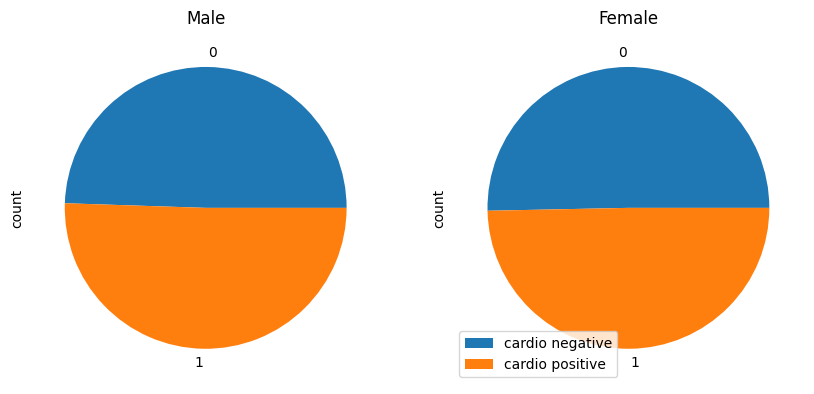

In [9]:
df_male=df[df["gender"]==2]
df_female=df[df["gender"]==1]

plt.figure(figsize=(10,9))

plt.subplot(1,2,1)
df_male["cardio"].value_counts().iloc[::-1].plot(kind="pie")
plt.title("Male")
plt.subplot(1,2,2)
df_female["cardio"].value_counts().plot(kind="pie")
plt.title("Female")
plt.legend(["cardio negative", "cardio positive"])



#### Fråga 7

Vi ser inga stora skillnader mellan kvinnor och män när det gäller hjärt-kärlsjukdomar. Bland män hittar vi sjukdomen hos knappt hälften, bland kvinnor hos drygt hälften. Vi vet dock inte hur urvalet har gjorts; det är möjligt att man försökt balansera båda grupperna så att det ska bli ungefär lika många positiva som negativa bland båda könen.

<Axes: xlabel='height', ylabel='Count'>

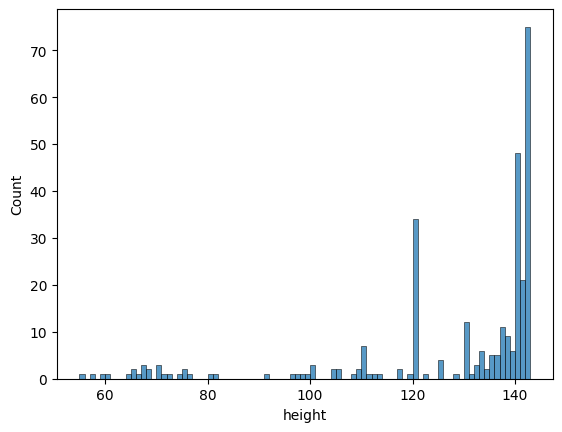

In [10]:
sns.histplot(df[df["height"]<144]["height"], binwidth=1)